<a href="https://colab.research.google.com/github/jotagectti/Challenge1-AlluraStore/blob/main/AluraStoreLatam_reporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [6]:
total_revenue_tienda1 = tienda['Precio'].sum()
total_revenue_tienda2 = tienda2['Precio'].sum()
total_revenue_tienda3 = tienda3['Precio'].sum()
total_revenue_tienda4 = tienda4['Precio'].sum()

print(f"Total facturacion de Tienda 1: {total_revenue_tienda1}")
print(f"Total facturacion de Tienda 2: {total_revenue_tienda2}")
print(f"Total facturacion de Tienda 3: {total_revenue_tienda3}")
print(f"Total facturacion de Tienda 4: {total_revenue_tienda4}")

Total facturacion de Tienda 1: 1150880400.0
Total facturacion de Tienda 2: 1116343500.0
Total facturacion de Tienda 3: 1098019600.0
Total facturacion de Tienda 4: 1038375700.0


# 2. Ventas por categoría

In [12]:
def analyze_category_sales(df, store_name):
  category_sales = df['Producto'].value_counts().reset_index()
  category_sales.columns = ['Producto', 'Number of Sales']

  print(f"\nVentas por categoria segun {store_name}:")
  print(category_sales)

  most_popular_category = category_sales.iloc[category_sales['Number of Sales'].idxmax()]
  print(f"\nEl producto mas popular en {store_name} es: {most_popular_category['Producto']} con {most_popular_category['Number of Sales']} ventas.")

analyze_category_sales(tienda, 'Tienda 1')
analyze_category_sales(tienda2, 'Tienda 2')
analyze_category_sales(tienda3, 'Tienda 3')
analyze_category_sales(tienda4, 'Tienda 4')


Ventas por categoria segun Tienda 1:
                       Producto  Number of Sales
0                    Microondas               60
1                 TV LED UHD 4K               60
2                       Armario               60
3              Secadora de ropa               58
4                 Mesa de noche               56
5       Bloques de construcción               56
6           Balón de baloncesto               55
7                     Bicicleta               54
8                  Vaso térmico               54
9                  Refrigerador               54
10                    Impresora               54
11                      Batería               53
12                   Cubertería               52
13    Carrito de control remoto               52
14          Modelado predictivo               51
15                  Auriculares               50
16            Ajedrez de madera               49
17                    Iphone 15               49
18                 Lavavajillas

/tmp/ipython-input-16-754736799.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Sales', y='Producto', data=top_products_tienda1, ax=axes[0, 0], palette='viridis')
/tmp/ipython-input-16-754736799.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Sales', y='Producto', data=top_products_tienda2, ax=axes[0, 1], palette='viridis')
/tmp/ipython-input-16-754736799.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Sales', y='Producto', data=top_products_tienda3, ax=axes[1, 0], palette='viridis')
/tmp

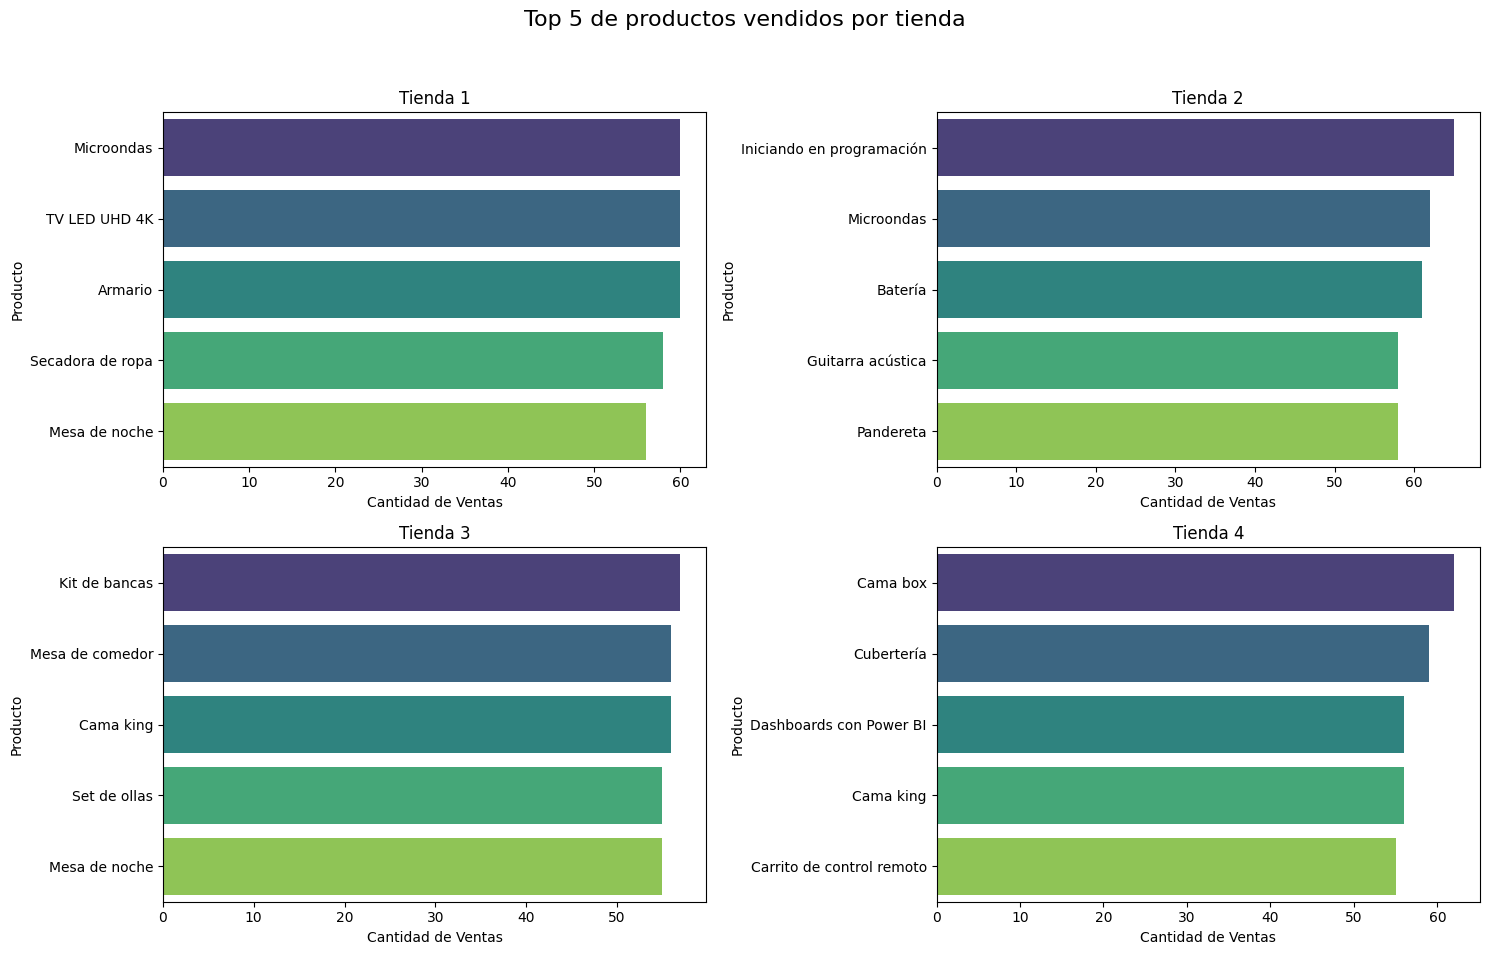

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def get_top_selling_products(df, n=5):
    product_sales = df['Producto'].value_counts().reset_index()
    product_sales.columns = ['Producto', 'Number of Sales']
    top_products = product_sales.head(n)
    return top_products

top_products_tienda1 = get_top_selling_products(tienda)
top_products_tienda2 = get_top_selling_products(tienda2)
top_products_tienda3 = get_top_selling_products(tienda3)
top_products_tienda4 = get_top_selling_products(tienda4)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Top 5 de productos vendidos por tienda', fontsize=16)

sns.barplot(x='Number of Sales', y='Producto', data=top_products_tienda1, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Tienda 1')
axes[0, 0].set_xlabel('Cantidad de Ventas')
axes[0, 0].set_ylabel('Producto')

sns.barplot(x='Number of Sales', y='Producto', data=top_products_tienda2, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Tienda 2')
axes[0, 1].set_xlabel('Cantidad de Ventas')
axes[0, 1].set_ylabel('Producto')

sns.barplot(x='Number of Sales', y='Producto', data=top_products_tienda3, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Tienda 3')
axes[1, 0].set_xlabel('Cantidad de Ventas')
axes[1, 0].set_ylabel('Producto')

sns.barplot(x='Number of Sales', y='Producto', data=top_products_tienda4, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Tienda 4')
axes[1, 1].set_xlabel('Cantidad de Ventas')
axes[1, 1].set_ylabel('Producto')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3. Calificación promedio de la tienda


In [18]:
average_rating_tienda1 = tienda['Calificación'].mean()
average_rating_tienda2 = tienda2['Calificación'].mean()
average_rating_tienda3 = tienda3['Calificación'].mean()
average_rating_tienda4 = tienda4['Calificación'].mean()

print(f"\nCalificacion promedio de la Tienda 1: {average_rating_tienda1:.2f}")
print(f"Calificacion promedio de la Tienda 2: {average_rating_tienda2:.2f}")
print(f"Calificacion promedio de la Tienda 3: {average_rating_tienda3:.2f}")
print(f"Calificacion promedio de la Tienda 4: {average_rating_tienda4:.2f}")


Calificacion promedio de la Tienda 1: 3.98
Calificacion promedio de la Tienda 2: 4.04
Calificacion promedio de la Tienda 3: 4.05
Calificacion promedio de la Tienda 4: 4.00


# 4. Productos más y menos vendidos


Productos vendidos en la tienda Tienda 1:
           Producto  Number of Sales
0        Microondas               60
1     TV LED UHD 4K               60
2           Armario               60
3  Secadora de ropa               58
4     Mesa de noche               56
                       Producto  Number of Sales
46  Ciencia de datos con Python               39
47                    Pandereta               36
48              Olla de presión               35
49    Auriculares con micrófono               33
50                 Celular ABXY               33

El producto mas vendido en la Tienda 1 es: Microondas con 60 ventas.
El producto menos vendido en la Tienda 1 es: Auriculares con micrófono con 33 ventas.


/tmp/ipython-input-20-4141008910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Sales', y='Producto', data=product_sales.head(10), palette='viridis')


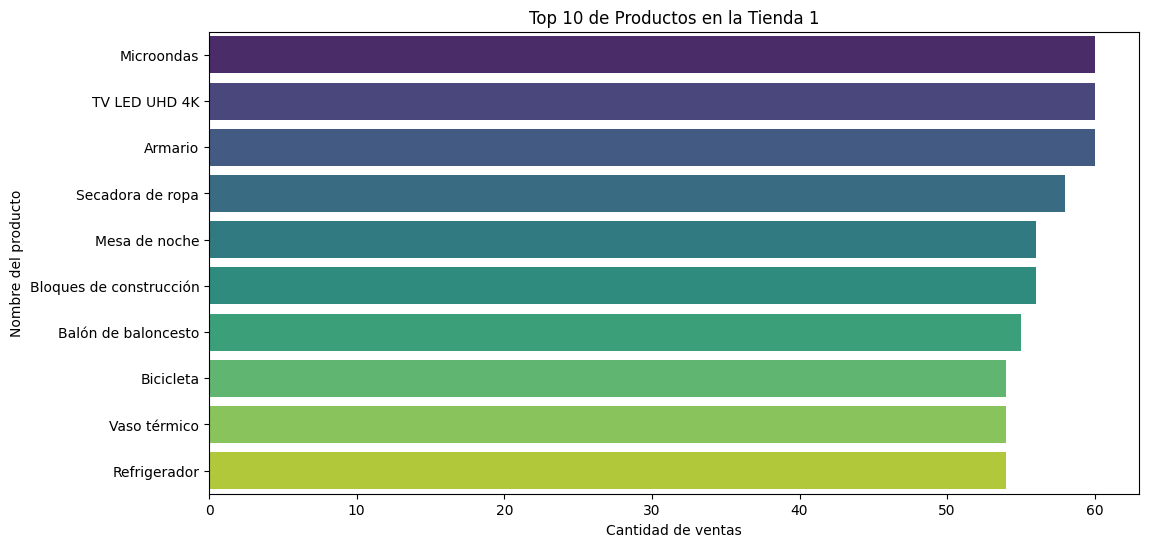


Productos vendidos en la tienda Tienda 2:
                    Producto  Number of Sales
0  Iniciando en programación               65
1                 Microondas               62
2                    Batería               61
3          Guitarra acústica               58
4                  Pandereta               58
           Producto  Number of Sales
46      Auriculares               37
47           Sillón               35
48  Mesa de comedor               34
49        Impresora               34
50    Juego de mesa               32

El producto mas vendido en la Tienda 2 es: Iniciando en programación con 65 ventas.
El producto menos vendido en la Tienda 2 es: Juego de mesa con 32 ventas.


/tmp/ipython-input-20-4141008910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Sales', y='Producto', data=product_sales.head(10), palette='viridis')


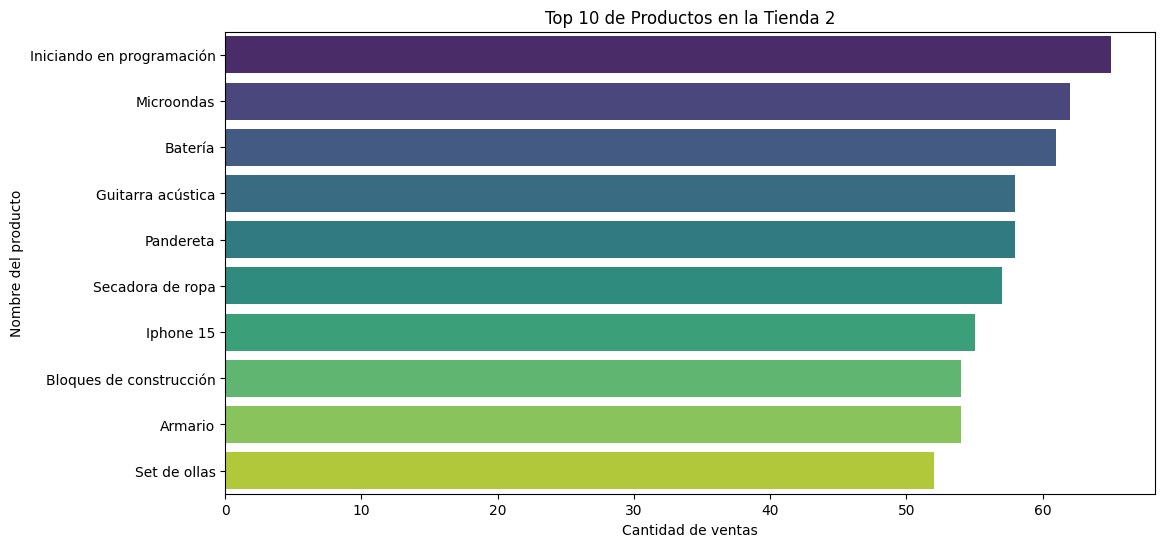


Productos vendidos en la tienda Tienda 3:
          Producto  Number of Sales
0    Kit de bancas               57
1  Mesa de comedor               56
2        Cama king               56
3     Set de ollas               55
4    Mesa de noche               55
                   Producto  Number of Sales
46       Guitarra eléctrica               38
47             Set de vasos               36
48                  Mochila               36
49               Microondas               36
50  Bloques de construcción               35

El producto mas vendido en la Tienda 3 es: Kit de bancas con 57 ventas.
El producto menos vendido en la Tienda 3 es: Bloques de construcción con 35 ventas.


/tmp/ipython-input-20-4141008910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Sales', y='Producto', data=product_sales.head(10), palette='viridis')


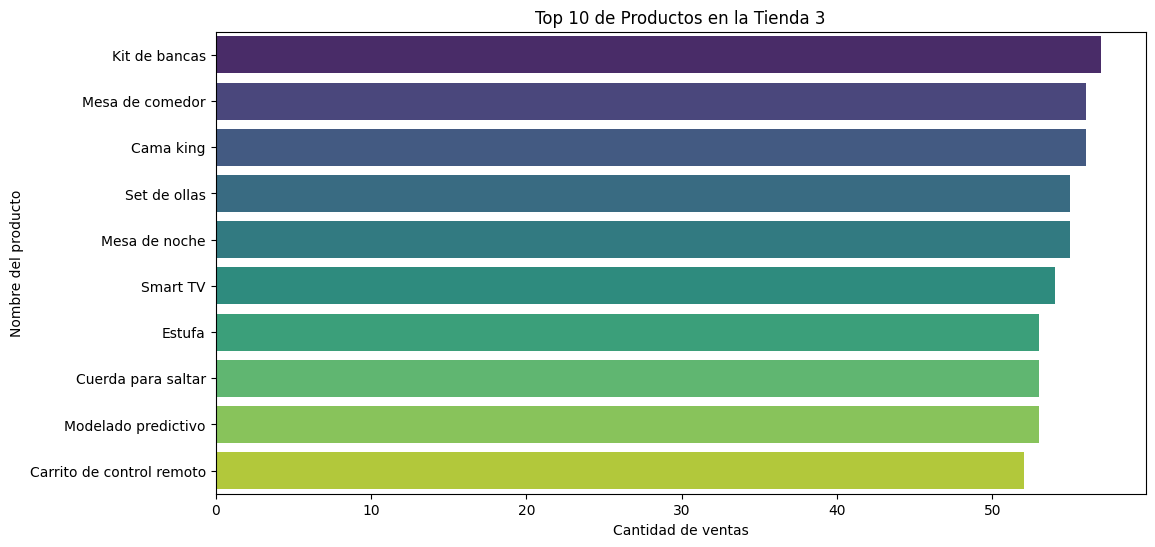


Productos vendidos en la tienda Tienda 4:
                    Producto  Number of Sales
0                   Cama box               62
1                 Cubertería               59
2    Dashboards con Power BI               56
3                  Cama king               56
4  Carrito de control remoto               55
                       Producto  Number of Sales
46                 Refrigerador               38
47  Ciencia de datos con Python               38
48            Guitarra acústica               37
49                      Armario               34
50           Guitarra eléctrica               33

El producto mas vendido en la Tienda 4 es: Cama box con 62 ventas.
El producto menos vendido en la Tienda 4 es: Guitarra eléctrica con 33 ventas.


/tmp/ipython-input-20-4141008910.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Sales', y='Producto', data=product_sales.head(10), palette='viridis')


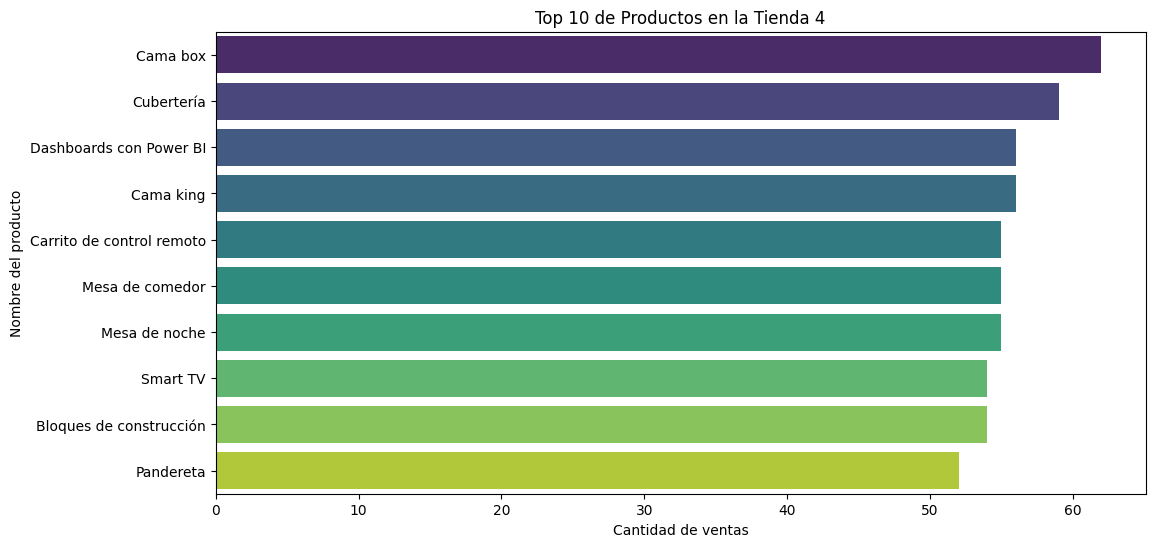

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_product_sales(df, store_name):
  product_sales = df['Producto'].value_counts().reset_index()
  product_sales.columns = ['Producto', 'Number of Sales']

  print(f"\nProductos vendidos en la tienda {store_name}:")
  print(product_sales.head())
  print(product_sales.tail())

  most_sold_product = product_sales.iloc[product_sales['Number of Sales'].idxmax()]
  least_sold_product = product_sales.iloc[product_sales['Number of Sales'].idxmin()]

  print(f"\nEl producto mas vendido en la {store_name} es: {most_sold_product['Producto']} con {most_sold_product['Number of Sales']} ventas.")
  print(f"El producto menos vendido en la {store_name} es: {least_sold_product['Producto']} con {least_sold_product['Number of Sales']} ventas.")

  plt.figure(figsize=(12, 6))
  sns.barplot(x='Number of Sales', y='Producto', data=product_sales.head(10), palette='viridis')
  plt.title(f'Top 10 de Productos en la {store_name}')
  plt.xlabel('Cantidad de ventas')
  plt.ylabel('Nombre del producto')
  plt.show()

analyze_product_sales(tienda, 'Tienda 1')
analyze_product_sales(tienda2, 'Tienda 2')
analyze_product_sales(tienda3, 'Tienda 3')
analyze_product_sales(tienda4, 'Tienda 4')

# 5. Envío promedio por tienda


Costo de envio promedio de la Tienda 1: 26018.61
Costo de envio promedio de la 2: 25216.24
Costo de envio promedio de la Tienda 3: 24805.68
Costo de envio promedio de la Tienda 4: 23459.46


/tmp/ipython-input-21-201811323.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stores, y=average_shipping_costs, palette='viridis')


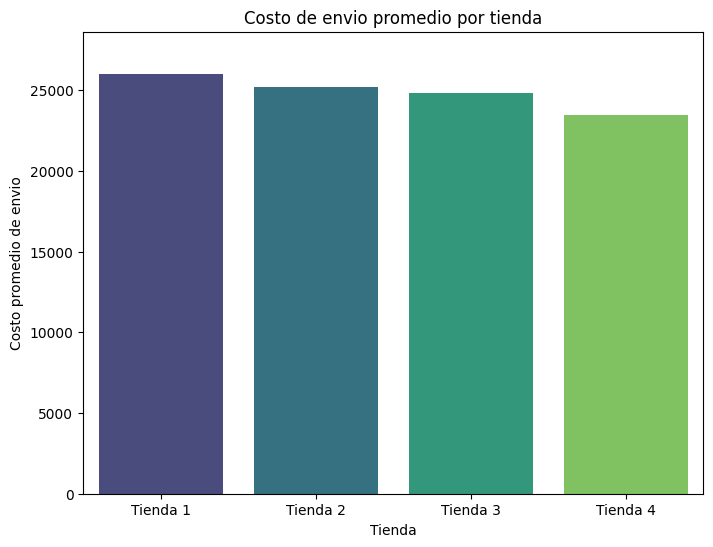

In [21]:
average_shipping_tienda1 = tienda['Costo de envío'].mean()
average_shipping_tienda2 = tienda2['Costo de envío'].mean()
average_shipping_tienda3 = tienda3['Costo de envío'].mean()
average_shipping_tienda4 = tienda4['Costo de envío'].mean()

print(f"\nCosto de envio promedio de la Tienda 1: {average_shipping_tienda1:.2f}")
print(f"Costo de envio promedio de la 2: {average_shipping_tienda2:.2f}")
print(f"Costo de envio promedio de la Tienda 3: {average_shipping_tienda3:.2f}")
print(f"Costo de envio promedio de la Tienda 4: {average_shipping_tienda4:.2f}")

# Create a bar plot to visualize the average shipping cost by store
stores = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
average_shipping_costs = [average_shipping_tienda1, average_shipping_tienda2, average_shipping_tienda3, average_shipping_tienda4]

plt.figure(figsize=(8, 6))
sns.barplot(x=stores, y=average_shipping_costs, palette='viridis')
plt.title('Costo de envio promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo promedio de envio')
plt.ylim(0, max(average_shipping_costs) * 1.1) # Adjust y-axis limit for better visualization
plt.show()

In [22]:
print("Informe Final: Recomendación de Tienda para Venta")
print("---------------------------------------------")

print("\nResumen de Hallazgos:")

# Ingresos totales
print(f"- Ingresos Totales: Tienda 1: ${total_revenue_tienda1:.2f}, Tienda 2: ${total_revenue_tienda2:.2f}, Tienda 3: ${total_revenue_tienda3:.2f}, Tienda 4: ${total_revenue_tienda4:.2f}")

# Calificaciones promedio
print(f"- Calificación Promedio de Clientes: Tienda 1: {average_rating_tienda1:.2f}, Tienda 2: {average_rating_tienda2:.2f}, Tienda 3: {average_rating_tienda3:.2f}, Tienda 4: {average_rating_tienda4:.2f}")

# Coste de envío promedio
print(f"- Coste de Envío Promedio: Tienda 1: ${average_shipping_tienda1:.2f}, Tienda 2: ${average_shipping_tienda2:.2f}, Tienda 3: ${average_shipping_tienda3:.2f}, Tienda 4: ${average_shipping_tienda4:.2f}")

# Análisis de ingresos
print("\nIngresos Totales:")
if total_revenue_tienda1 >= max(total_revenue_tienda2, total_revenue_tienda3, total_revenue_tienda4):
    print(f"- La Tienda 1 presenta los mayores ingresos totales (${total_revenue_tienda1:.2f}).")
elif total_revenue_tienda2 >= max(total_revenue_tienda1, total_revenue_tienda3, total_revenue_tienda4):
     print(f"- La Tienda 2 presenta los mayores ingresos totales (${total_revenue_tienda2:.2f}).")
elif total_revenue_tienda3 >= max(total_revenue_tienda1, total_revenue_tienda2, total_revenue_tienda4):
    print(f"- La Tienda 3 presenta los mayores ingresos totales (${total_revenue_tienda3:.2f}).")
else:
     print(f"- La Tienda 4 presenta los mayores ingresos totales (${total_revenue_tienda4:.2f}).")

# Análisis de calificación promedio
print("\nCalificación Promedio de Clientes:")
if average_rating_tienda1 >= max(average_rating_tienda2, average_rating_tienda3, average_rating_tienda4):
    print(f"- La Tienda 1 tiene la calificación promedio más alta ({average_rating_tienda1:.2f}), lo que sugiere una mayor satisfacción del cliente.")
elif average_rating_tienda2 >= max(average_rating_tienda1, average_rating_tienda3, average_rating_tienda4):
    print(f"- La Tienda 2 tiene la calificación promedio más alta ({average_rating_tienda2:.2f}), lo que sugiere una mayor satisfacción del cliente.")
elif average_rating_tienda3 >= max(average_rating_tienda1, average_rating_tienda2, average_rating_tienda4):
    print(f"- La Tienda 3 tiene la calificación promedio más alta ({average_rating_tienda3:.2f}), lo que sugiere una mayor satisfacción del cliente.")
else:
    print(f"- La Tienda 4 tiene la calificación promedio más alta ({average_rating_tienda4:.2f}), lo que sugiere una mayor satisfacción del cliente.")

# Análisis de coste de envío
print("\nCoste de Envío Promedio:")
if average_shipping_tienda1 <= min(average_shipping_tienda2, average_shipping_tienda3, average_shipping_tienda4):
    print(f"- La Tienda 1 presenta el coste de envío promedio más bajo (${average_shipping_tienda1:.2f}).")
elif average_shipping_tienda2 <= min(average_shipping_tienda1, average_shipping_tienda3, average_shipping_tienda4):
     print(f"- La Tienda 2 presenta el coste de envío promedio más bajo (${average_shipping_tienda2:.2f}).")
elif average_shipping_tienda3 <= min(average_shipping_tienda1, average_shipping_tienda2, average_shipping_tienda4):
    print(f"- La Tienda 3 presenta el coste de envío promedio más bajo (${average_shipping_tienda3:.2f}).")
else:
     print(f"- La Tienda 4 presenta el coste de envío promedio más bajo (${average_shipping_tienda4:.2f}).")

# Conclusión y Recomendación
print("\nConclusión:")
print("Basándonos en el análisis exhaustivo de los ingresos, la satisfacción del cliente, los patrones de venta de productos/categorías y los costes de envío, se puede determinar la tienda más adecuada para focalizar las ventas.")
print("\nRecomendación:")

best_store = None
max_revenue = 0
highest_rating = 0

# Determinar la tienda con mayores ingresos
if total_revenue_tienda1 > max_revenue:
    max_revenue = total_revenue_tienda1
    best_store = 'Tienda 1'
if total_revenue_tienda2 > max_revenue:
    max_revenue = total_revenue_tienda2
    best_store = 'Tienda 2'
if total_revenue_tienda3 > max_revenue:
    max_revenue = total_revenue_tienda3
    best_store = 'Tienda 3'
if total_revenue_tienda4 > max_revenue:
    max_revenue = total_revenue_tienda4
    best_store = 'Tienda 4'

print("\nSe recomienda invertir recursos en estrategias de marketing y optimización de inventario dirigidas a la **{best_store}** para maximizar el retorno de la inversión.")
print("Es importante seguir monitoreando las tendencias de venta, la satisfacción del cliente y los costes en todas las tiendas para adaptar la estrategia según sea necesario.")


Informe Final: Recomendación de Tienda para Venta
---------------------------------------------

Resumen de Hallazgos:
- Ingresos Totales: Tienda 1: $1150880400.00, Tienda 2: $1116343500.00, Tienda 3: $1098019600.00, Tienda 4: $1038375700.00
- Calificación Promedio de Clientes: Tienda 1: 3.98, Tienda 2: 4.04, Tienda 3: 4.05, Tienda 4: 4.00
- Coste de Envío Promedio: Tienda 1: $26018.61, Tienda 2: $25216.24, Tienda 3: $24805.68, Tienda 4: $23459.46

Ingresos Totales:
- La Tienda 1 presenta los mayores ingresos totales ($1150880400.00).

Calificación Promedio de Clientes:
- La Tienda 3 tiene la calificación promedio más alta (4.05), lo que sugiere una mayor satisfacción del cliente.

Coste de Envío Promedio:
- La Tienda 4 presenta el coste de envío promedio más bajo ($23459.46).

Conclusión:
Basándonos en el análisis exhaustivo de los ingresos, la satisfacción del cliente, los patrones de venta de productos/categorías y los costes de envío, se puede determinar la tienda más adecuada para

In [23]:
import folium
from folium.plugins import HeatMap

all_stores = pd.concat([tienda.assign(Store='Tienda 1'),
                       tienda2.assign(Store='Tienda 2'),
                       tienda3.assign(Store='Tienda 3'),
                       tienda4.assign(Store='Tienda 4')])
all_stores['lat'] = pd.to_numeric(all_stores['lat'], errors='coerce')
all_stores['lon'] = pd.to_numeric(all_stores['lon'], errors='coerce')
all_stores.dropna(subset=['lat', 'lon'], inplace=True)

center_lat = all_stores['lat'].mean()
center_lon = all_stores['lon'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

store_locations = all_stores.drop_duplicates(subset=['Store'])
for index, row in store_locations.iterrows():
    folium.Marker([row['lat'], row['lon']], popup=row['Store']).add_to(m)

heat_data = [[row['lat'], row['lon'], row['Precio']] for index, row in all_stores.iterrows()]
HeatMap(heat_data).add_to(m)
m